In [1]:
import sys
sys.path.append('../scripts/')
from kf import *
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse



<IPython.core.display.Javascript object>


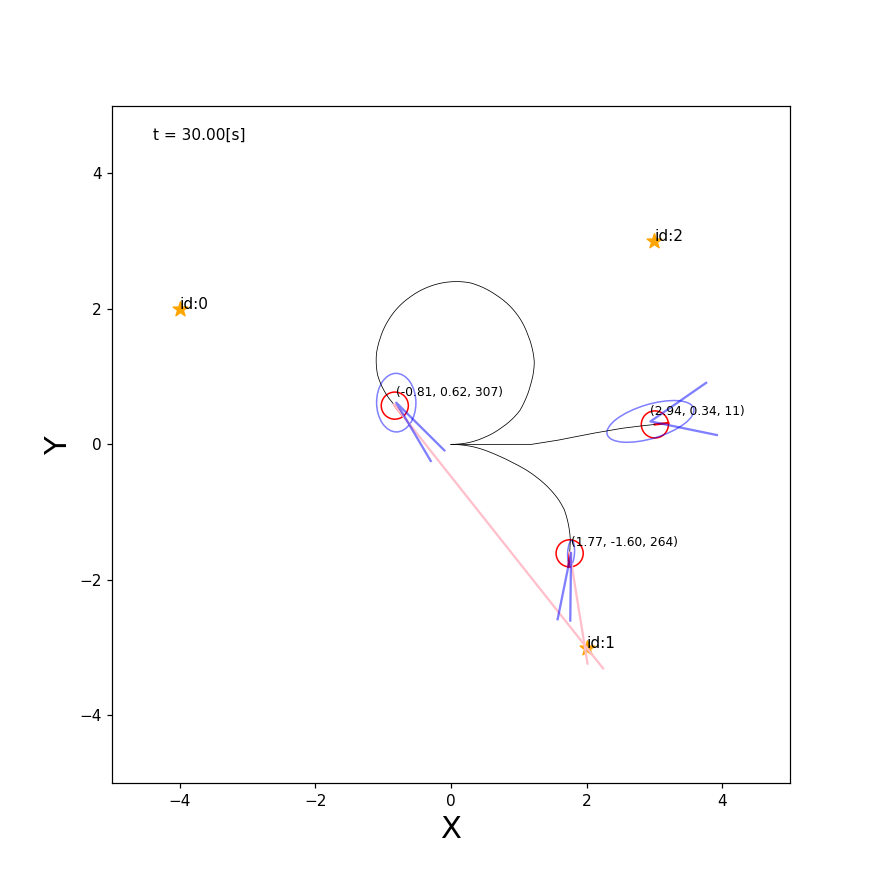

In [2]:

def trial():
    time_interval = 0.1
    world = World(30, time_interval, debug=False)
    
    # 地図を作成してランドマークを追加
    m = Map()
    for ln in [(-4, 2), (2, -3), (3, 3)]:
        m.append_landmark(LandMark(*ln))
    world.append(m)
    
    # ロボットを作る
    initial_pose = np.array([0, 0, 0]).T
    kf = KalmanFilter(m, initial_pose)
    circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, kf)
    r = Robot(initial_pose, sensor=Camera(m, distance_bias_rate_stddev=0, direction_bias_stddev=0), agent=circling, color="red")        # ロボット1台目
    world.append(r)
    
    kf = KalmanFilter(m, initial_pose)
    linear = EstimationAgent(time_interval, 0.1, 0.0, kf)
    r = Robot(initial_pose, sensor=Camera(m, distance_bias_rate_stddev=0, direction_bias_stddev=0), agent=linear, color="red")        # ロボット2台目
    world.append(r)
    
    kf = KalmanFilter(m, initial_pose)
    right = EstimationAgent(time_interval, 0.1, -3.0/180*math.pi, kf)
    r = Robot(initial_pose, sensor=Camera(m, distance_bias_rate_stddev=0, direction_bias_stddev=0), agent=right, color="red")        # ロボット3台目
    world.append(r)
    
    # アニメーション実行
    world.draw()
    
trial()


# In[ ]:
